# PART 01 :BASIC EXPLORATION 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import glob
import os
import zipfile

zip_files = glob.glob('/content/drive/My Drive/Colab Notebooks/*.zip')

for zip_filename in zip_files:
    dir_name = os.path.splitext(zip_filename)[0]
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        zip_handler = zipfile.ZipFile(zip_filename, "r")
        zip_handler.extractall(dir_name)
    else:
        print("you have already  extracted",dir_name)

you have already  extracted /content/drive/My Drive/Colab Notebooks/train
you have already  extracted /content/drive/My Drive/Colab Notebooks/test


In [3]:
#READ DATA 
#!cp "/content/drive/My Drive/Colab Notebooks/train" -r "/content"
#use this 
%rm -rf /content/train
!unzip "/content/drive/My Drive/Colab Notebooks/train.zip" -d "/content/train"
#%rm -rf /content/Black-grass

Archive:  /content/drive/My Drive/Colab Notebooks/train.zip
  inflating: /content/train/Black-grass/0050f38b3.png  
  inflating: /content/train/Black-grass/0183fdf68.png  
  inflating: /content/train/Black-grass/0260cffa8.png  
  inflating: /content/train/Black-grass/05eedce4d.png  
  inflating: /content/train/Black-grass/075d004bc.png  
  inflating: /content/train/Black-grass/078eae073.png  
  inflating: /content/train/Black-grass/082314602.png  
  inflating: /content/train/Black-grass/0ace21089.png  
  inflating: /content/train/Black-grass/0b228a6b8.png  
  inflating: /content/train/Black-grass/0b3e7a7a9.png  
  inflating: /content/train/Black-grass/0bb75ded8.png  
  inflating: /content/train/Black-grass/0be707615.png  
  inflating: /content/train/Black-grass/0c67c3fc3.png  
  inflating: /content/train/Black-grass/0d1a9985f.png  
  inflating: /content/train/Black-grass/0d28c429b.png  
  inflating: /content/train/Black-grass/0d4f74f4a.png  
  inflating: /content/train/Black-grass/0dad

In [4]:
import glob
import cv2
import os
import numpy as np
from natsort import natsorted

from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
paths = glob.glob("/content/drive/My Drive/Colab Notebooks/train/*")
label_names = [os.path.split(x)[-1] for x in paths]

print("Total labels: {}".format(len(label_names)))
print("Labels: {}".format(label_names))

Total labels: 12
Labels: ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


#TAKE SAMPLE FROM EACH CLASS

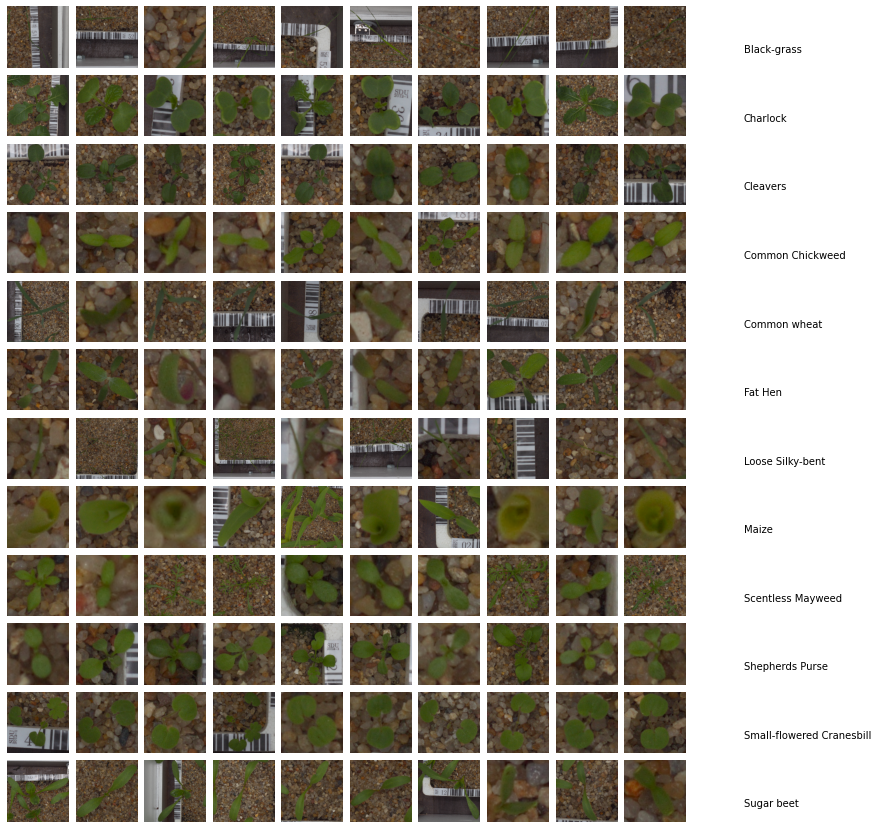

In [6]:

fig = plt.figure(1, (20, 15))
grid = ImageGrid(fig, 111, nrows_ncols=(12, 10), axes_pad=0.1)

n_img_class = []
counter = 0
for idx, label in enumerate(label_names):
    paths = glob.glob(os.path.join("/content/train", label, "*.png"))
    n_img_class.append([label, len(paths)])
    perm = np.random.choice(len(paths), size=10)
    
    title = True
    for ii in perm:
        ax = grid[counter]
        if title:
            ax.text(1800, 105, label, verticalalignment="center")
            title = False
        img = cv2.imread(paths[ii])
        img = cv2.resize(img, (150, 150))
        ax.axis("off")
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        counter += 1
        
plt.show()

In [7]:
# CHECK DATA FROM EACH CLASS 
total = 0
for name, value in n_img_class:
    print("{}\t{}".format(value, name))
    total += value
    
print("\nTotal samples: {}".format(total))

263	Black-grass
390	Charlock
287	Cleavers
611	Common Chickweed
221	Common wheat
475	Fat Hen
654	Loose Silky-bent
221	Maize
516	Scentless Mayweed
231	Shepherds Purse
496	Small-flowered Cranesbill
385	Sugar beet

Total samples: 4750


# MODEL 1 PRETRAINED VGG 16 WITH DATA AUGMENTATION 

In [8]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline
IMG_DIM = (150, 150)

In [9]:
train_files = glob.glob("/content/train/*/*")
#train_files =paths
#IMAGES 
#EXTRACT IMAGE FROM PATH
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]



In [10]:
#CONVERT IAGE TO ARRAY 
train_imgs = np.array(train_imgs)


In [11]:
#SCALE THE IMAGE AFTER CONVERTING INTO FLLOAT
train_imgs_scaled = train_imgs.astype('float32')
#train_imgs_scaled /= 255

In [12]:
len(train_files)

4750

In [13]:
import pandas as pd 
#LABELS :
#ENCODE LABEL :
# encode text category labels
train_labels = [x.split("/")[-2] for x in train_files]
train_labels_enc =pd.get_dummies(train_labels)
#train_labels_enc=train_labels

In [14]:
print(train_files[:10])
print(train_imgs_scaled)
print(train_labels[:10])
print(train_labels_enc[:10])


['/content/train/Shepherds Purse/8e3462539.png', '/content/train/Shepherds Purse/19fb8b2cc.png', '/content/train/Shepherds Purse/1ea4479e9.png', '/content/train/Shepherds Purse/810110db6.png', '/content/train/Shepherds Purse/4e3c115a4.png', '/content/train/Shepherds Purse/98431cfc6.png', '/content/train/Shepherds Purse/0bef4ae08.png', '/content/train/Shepherds Purse/57fe6d08a.png', '/content/train/Shepherds Purse/688da98a7.png', '/content/train/Shepherds Purse/debcefa3f.png']
[[[[ 93.  71.  49.]
   [112.  87.  66.]
   [128. 105.  81.]
   ...
   [101.  82.  62.]
   [ 98.  78.  58.]
   [ 67.  47.  28.]]

  [[ 72.  51.  35.]
   [ 71.  42.  26.]
   [120. 100.  79.]
   ...
   [102.  83.  65.]
   [ 96.  78.  59.]
   [ 94.  79.  65.]]

  [[ 74.  53.  44.]
   [ 82.  67.  60.]
   [ 76.  53.  41.]
   ...
   [102.  86.  68.]
   [ 97.  80.  57.]
   [ 95.  78.  57.]]

  ...

  [[ 89.  71.  58.]
   [ 89.  70.  56.]
   [ 79.  65.  50.]
   ...
   [ 93.  78.  61.]
   [ 96.  81.  64.]
   [ 95.  78.  62.

In [15]:
# CHANGETHE INPUT IMAGE BY MASKING THEM 
#train_imgs_scaled

# convert image from RGB to HSV
# Apply closing opration(one of mophological opration)
# Apply segmentation
# Apply sharpening

def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

#put all together 
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen



In [16]:
#iterate on all images 
for indx, image in enumerate(train_imgs_scaled):
  try:
     train_imgs_scaled[indx] = segment(image)
      
  except:
    print(indx)
    continue

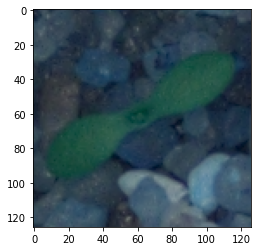

In [17]:
#LETS TRY FORONE IMAGE AND SEE WHAT  HAPPENED AT EACH STAGE
image = cv2.imread("train/Scentless Mayweed/1300c3cd9.png")
plt.imshow(image) 

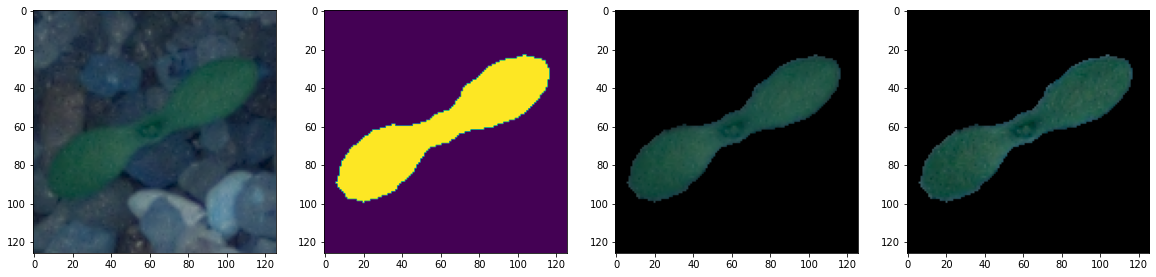

In [18]:
image_mask = create_mask_for_plant(image)
image_segmented = segment_plant(image)
image_sharpen = sharpen_image(image_segmented)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(image_mask)
axs[2].imshow(image_segmented)
axs[3].imshow(image_sharpen)

In [19]:
from sklearn.model_selection import train_test_split
X =train_imgs_scaled
y=train_labels_enc
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3, random_state=4750)
#Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=250, random_state=4750)


print("All shapes")
print(Xtr.shape)
print(Xte.shape)
print(ytr.shape)
print(yte.shape)

All shapes
(3325, 150, 150, 3)
(1425, 150, 150, 3)
(3325, 12)
(1425, 12)


In [20]:
#VGG16 with augmentation 
train_imgs=Xtr
validation_imgs=Xte
train_labels_enc=ytr
validation_labels_enc=yte

In [21]:
BATCH_SIZE =32
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=BATCH_SIZE)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=BATCH_SIZE)



In [22]:
import keras
input_shape = (150, 150, 3)
from keras.applications import vgg16
from keras.models import Model
#BYdefault vgg 16 trained on 224 X 224 if we want to provide separate size then provide input_shape
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

vgg_model.summary()



58892288/58889256 [==============================] - 1s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_______________________________________________________

In [23]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fd3bf1e2518>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3bef68898>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3bef68ba8>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fd3be7292b0>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3be729cc0>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3be746b38>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fd3be746be0>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3be74f780>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3be75a5f8>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fd3be75aa20>,block3_conv3,False


In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 8192)              14714688  
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                6156      
Total params: 19,178,316
Trainable params: 4,463,628
Non-trainable params: 14,714,688
____________________________________

In [25]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [26]:
import keras
print(keras.__version__)

2.4.3


In [27]:
len(train_imgs)//20


166

In [28]:
history = model.fit(train_generator, steps_per_epoch=len(train_imgs)//BATCH_SIZE, epochs=30,
                              validation_data=val_generator, validation_steps=len(validation_imgs)//BATCH_SIZE, verbose=1)


Epoch 1/30
103/103 [==============================] - 20s 194ms/step - loss: 2.5058 - accuracy: 0.1127 - val_loss: 2.4313 - val_accuracy: 0.1413
Epoch 2/30
103/103 [==============================] - 20s 190ms/step - loss: 2.4660 - accuracy: 0.1092 - val_loss: 2.4274 - val_accuracy: 0.1413
Epoch 3/30
103/103 [==============================] - 19s 187ms/step - loss: 2.4498 - accuracy: 0.1193 - val_loss: 2.4309 - val_accuracy: 0.1222
Epoch 4/30
103/103 [==============================] - 19s 186ms/step - loss: 2.4352 - accuracy: 0.1266 - val_loss: 2.4310 - val_accuracy: 0.1413
Epoch 5/30
103/103 [==============================] - 19s 187ms/step - loss: 2.4304 - accuracy: 0.1312 - val_loss: 2.4302 - val_accuracy: 0.1413
Epoch 6/30
103/103 [==============================] - 19s 188ms/step - loss: 2.4334 - accuracy: 0.1148 - val_loss: 2.4297 - val_accuracy: 0.1229
Epoch 7/30
103/103 [==============================] - 19s 187ms/step - loss: 2.4291 - accuracy: 0.1339 - val_loss: 2.4295 - val_ac

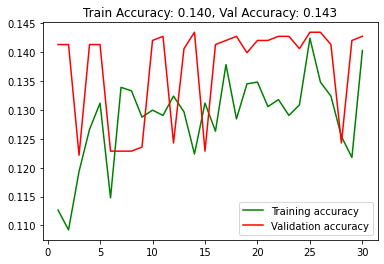

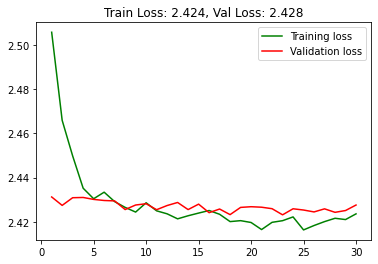

In [29]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()

In [30]:

print(model.evaluate(train_imgs, train_labels_enc))  # Evaluate on train set
print(model.evaluate(validation_imgs, validation_labels_enc))  # Evaluate on test set

104/104 [==============================] - 7s 63ms/step - loss: 2.4148 - accuracy: 0.1359
[2.4148435592651367, 0.1359398514032364]
45/45 [==============================] - 3s 75ms/step - loss: 2.4275 - accuracy: 0.1418
[2.427474021911621, 0.1417543888092041]


# MODEL 2 :PRE TRAINED VGG16 WITH  CALL BACKS AND  CLASS WEIGHTS 

#3 new things tried 

1.   CALL BACK for EarlyStopping
2.   ReduceLROnPlateau
3.   DEAL with class imbalance using CLASS WEIGHTS 


In [31]:
print("All shapes")
print(Xtr.shape)
print(Xte.shape)
print(ytr.shape)
print(yte.shape)
train_imgs=Xtr
validation_imgs=Xte
train_labels_enc=ytr
validation_labels_enc=yte

All shapes
(3325, 150, 150, 3)
(1425, 150, 150, 3)
(3325, 12)
(1425, 12)


In [32]:
#VGG PRETRAINED :
import keras
input_shape = (150, 150, 3)
from keras.applications import vgg16
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras import optimizers

prior = keras.applications.VGG16(
    include_top=False, 
    weights='imagenet',
    input_shape=(150, 150, 3)
)

model = Sequential()
model.add(prior)
model.add(Flatten())
model.add(Dense(256, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.1, name='Dropout_Regularization'))
model.add(Dense(12, activation='softmax', name='Output'))

# Freeze the VGG16 model, e.g. do not train any of its weights.
# We will just use it as-is.
for cnn_block_layer in model.layers[0].layers:
    cnn_block_layer.trainable = False
model.layers[0].trainable = False


# Compile the model. I found that RMSprop with the default learning
# weight worked fine.
model.compile(
    optimizer=optimizers.RMSprop(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
Dense_Intermediate (Dense)   (None, 256)               2097408   
_________________________________________________________________
Dropout_Regularization (Drop (None, 256)               0         
_________________________________________________________________
Output (Dense)               (None, 12)                3084      
Total params: 16,815,180
Trainable params: 2,100,492
Non-trainable params: 14,714,688
_________________________________________________________________


In [33]:
#CLASS WEIGHTS 

In [34]:
# Recall that our dataset is highly imbalanced. We deal with this
# problem by generating class weights and passing them to the model
# at training time. The model will use the class weights to adjust
# how it trains so that each class is considered equally important to
# get right, even if the actual distribution of images is highly 
# variable.
import os
labels_count = dict()
for img_class in [ic for ic in os.listdir('/content/train/') if ic[0] != '.']:
    labels_count[img_class] = len(os.listdir('/content/train/' + img_class))
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in 
                 enumerate(labels_count.values())}
print(labels_count)
print("Weight of each class is ")
print(class_weights)


{'Shepherds Purse': 231, 'Common Chickweed': 611, 'Common wheat': 221, 'Cleavers': 287, 'Charlock': 390, 'Small-flowered Cranesbill': 496, 'Fat Hen': 475, 'Scentless Mayweed': 516, 'Maize': 221, 'Sugar beet': 385, 'Loose Silky-bent': 654, 'Black-grass': 263}
Weight of each class is 
{0: 20.562770562770563, 1: 7.774140752864157, 2: 21.493212669683256, 3: 16.550522648083625, 4: 12.179487179487179, 5: 9.576612903225806, 6: 10.0, 7: 9.205426356589147, 8: 21.493212669683256, 9: 12.337662337662337, 10: 7.2629969418960245, 11: 18.06083650190114}


In [35]:
BATCH_SIZE =32
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')


val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=BATCH_SIZE)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=BATCH_SIZE)

In [36]:
# Step 4: fit the model.
#
# Finally we fit the model. I use two callbacks here: 
#
#*******EarlyStopping ***************************
#
# which stops the model short of its full 20 epochs if validation 
# performance consistently gets worse; and
#
#******** ReduceLROnPlateau**********************
# which  reduces the learning rate 10x at a time when it detects model 
# performance is no longer improving between epochs.
#
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
history = model.fit(train_generator,
                    steps_per_epoch=len(train_imgs)//BATCH_SIZE, epochs=30,
                    validation_data=val_generator,
                    validation_steps=len(validation_imgs)//BATCH_SIZE, 
                    callbacks=[
                    EarlyStopping(patience=3, restore_best_weights=True),
                    ReduceLROnPlateau(patience=2)
                    ],
                    class_weight=class_weights
                     ,verbose=1)


Epoch 1/30
103/103 [==============================] - 20s 190ms/step - loss: 34.5787 - accuracy: 0.1042 - val_loss: 2.4805 - val_accuracy: 0.0632
Epoch 2/30
103/103 [==============================] - 19s 186ms/step - loss: 32.9095 - accuracy: 0.1187 - val_loss: 2.5156 - val_accuracy: 0.0909
Epoch 3/30
103/103 [==============================] - 19s 187ms/step - loss: 32.5927 - accuracy: 0.1157 - val_loss: 2.4861 - val_accuracy: 0.0909
Epoch 4/30
103/103 [==============================] - 19s 188ms/step - loss: 32.5023 - accuracy: 0.1166 - val_loss: 2.4971 - val_accuracy: 0.0916


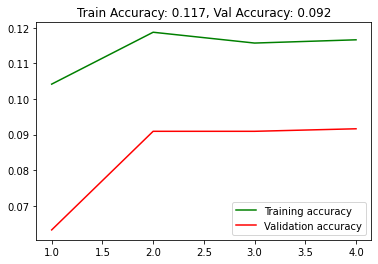

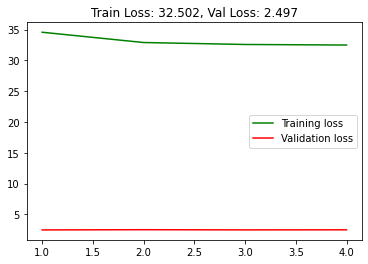

In [37]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()

# MODEL 3 : PRETRAINED RESNET 

In [38]:
input_shape = (150, 150, 3)
from keras.applications.resnet50 import ResNet50,preprocess_input
#from keras.applications.resnet50 import ResNet50
from keras.models import Model
import keras
resnet_model = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
output = resnet_model.layers[-1].output
output = keras.layers.Flatten()(output)
resnet_model = Model(resnet_model.input, output)
for layer in resnet_model.layers:
    if isinstance(layer, keras.layers.BatchNormalization):
        layer.trainable = True
    else:
        layer.trainable = False
resnet_model.summary()

94773248/94765736 [==============================] - 2s 0us/step
Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 156, 156, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 75, 75, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1_conv[0][0]                 
______________________

In [39]:
#PLEASE NOTE THAT FINAL LAYER OF RESNET CONTAINS :5X5X2048 so total 512000 parameter

In [40]:
import keras
input_shape = (150, 150, 3)
from keras.applications import vgg16
from keras.models import Model
#BYdefault vgg 16 trained on 224 X 224 if we want to provide separate size then provide input_shape
vgg = vgg16.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

vgg_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)      

In [41]:
#PLEASE NOTE THAT VGG 16 has 4X4X512 so total 8192 parameter

In [42]:


#Any pretrained model can be used the same way 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
#ADD ANY PREDEFINED MODEL AS FEATURE EXTRACTOR 
#model.add(vgg_model)
model.add(resnet_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_3 (Functional)    (None, 51200)             23587712  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                6156      
Total params: 50,071,436
Trainable params: 26,536,844
Non-trainable params: 23,534,592
_________________________________

In [43]:
# Step 4: fit the model.
#
# Finally we fit the model. I use two callbacks here: 
#
#*******EarlyStopping ***************************
#
# which stops the model short of its full 20 epochs if validation 
# performance consistently gets worse; and
#
#******** ReduceLROnPlateau**********************
# which  reduces the learning rate 10x at a time when it detects model 
# performance is no longer improving between epochs.
#
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
train_imgs=preprocess_input(train_imgs)
validation_imgs =preprocess_input(validation_imgs)
history = model.fit(train_generator,
                    steps_per_epoch=len(train_imgs)//BATCH_SIZE, epochs=30,
                    validation_data=val_generator,
                    validation_steps=len(validation_imgs)//BATCH_SIZE, 
                    callbacks=[
                    EarlyStopping(patience=3, restore_best_weights=True),
                    ReduceLROnPlateau(patience=2)
                    ],
                    class_weight=class_weights
                     ,verbose=1)


Epoch 1/30
103/103 [==============================] - 24s 238ms/step - loss: 34.4834 - accuracy: 0.1105 - val_loss: 2.8442 - val_accuracy: 0.1051
Epoch 2/30
103/103 [==============================] - 23s 223ms/step - loss: 33.0135 - accuracy: 0.1206 - val_loss: 3.6825 - val_accuracy: 0.1044
Epoch 3/30
103/103 [==============================] - 23s 223ms/step - loss: 33.1343 - accuracy: 0.1187 - val_loss: 3.4825 - val_accuracy: 0.0909
Epoch 4/30
103/103 [==============================] - 23s 224ms/step - loss: 32.8894 - accuracy: 0.1160 - val_loss: 4.1079 - val_accuracy: 0.0923


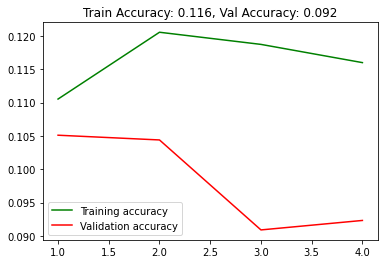

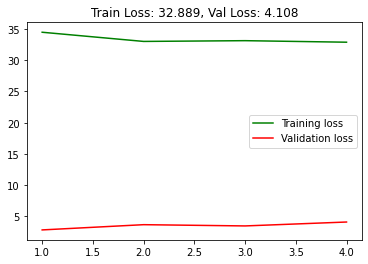

In [44]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()